In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

import spacy
import re
import nltk

from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
from collections import Counter

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [35]:
df = pd.read_csv(r"C:\Users\lily\Desktop\IT alapok privát\PRIV DATA SC NLP\Wordcloud\Womens Clothing E-Commerce Reviews.csv")

In [36]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comfortable,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c",3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,1,6,General,Tops,Blouses


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [38]:
df.isnull().sum() / len(df)

Unnamed: 0                 0.000000
Clothing ID                0.000000
Age                        0.000000
Title                      0.162224
Review Text                0.035979
Rating                     0.000000
Recommended IND            0.000000
Positive Feedback Count    0.000000
Division Name              0.000596
Department Name            0.000596
Class Name                 0.000596
dtype: float64

In [39]:
df = df.loc[:10000]

In [40]:
df.drop(['Unnamed: 0', 'Title'], axis=1, inplace=True)
df.dropna(inplace=True)

In [41]:
df.columns

Index(['Clothing ID', 'Age', 'Review Text', 'Rating', 'Recommended IND',
       'Positive Feedback Count', 'Division Name', 'Department Name',
       'Class Name'],
      dtype='object')

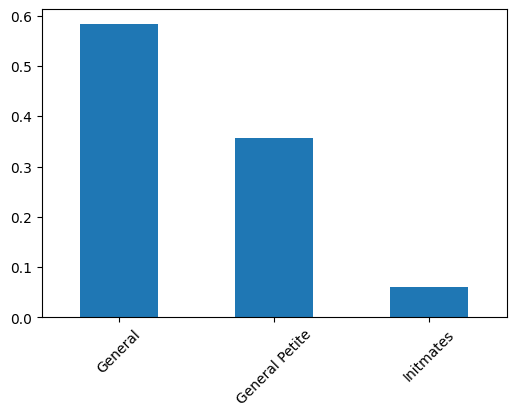

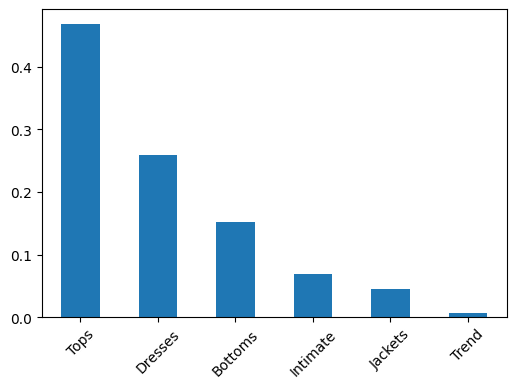

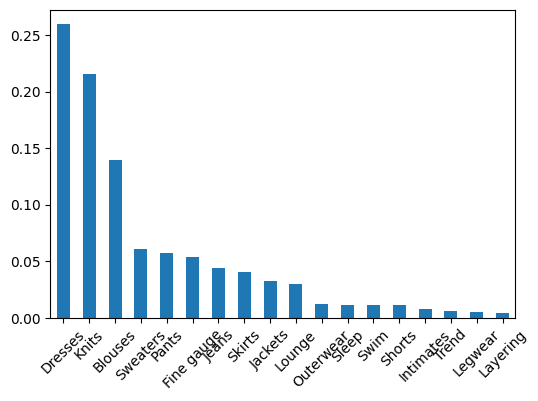

In [42]:
col = ['Division Name', 'Department Name', 'Class Name']

for i in df[col]:
    #print(f"Column: {i}")
    #print(df[i].value_counts())
    #print("\n")
    plt.figure(figsize=(6,4))
    df[i].value_counts(normalize = True).plot(kind='bar')
    plt.xticks(rotation=45)
    plt.show()

<AxesSubplot: >

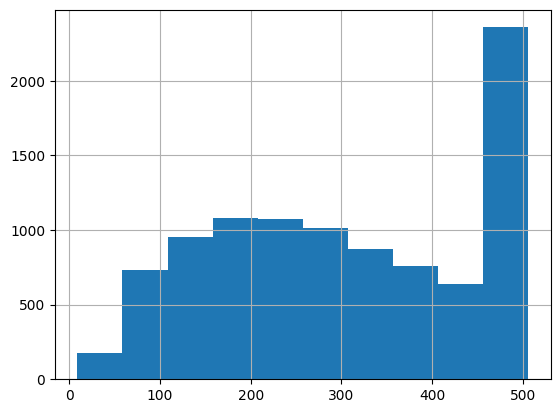

In [43]:
df['Review Text'].str.len().hist()

### SPACY

In [44]:
nlp = spacy.load('en_core_web_sm')

In [46]:
def preprocess_text_spacy(text):
    doc = nlp(text)
    tokens = []
    for token in doc:
        if token.is_alpha and not token.is_stop:
            tokens.append(token.lemma_.lower())
    return ' '.join(tokens)

In [47]:
df['cleaned_review_text'] = df['Review Text'].apply(preprocess_text_spacy)

In [48]:
pd.set_option('display.max_colwidth', None)
print(df[['Review Text', 'cleaned_review_text']].head())

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            Review Text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                 Absolutely wonderful - silky and sexy and c

In [18]:
text = ' '.join(df['cleaned_review_text'].dropna())

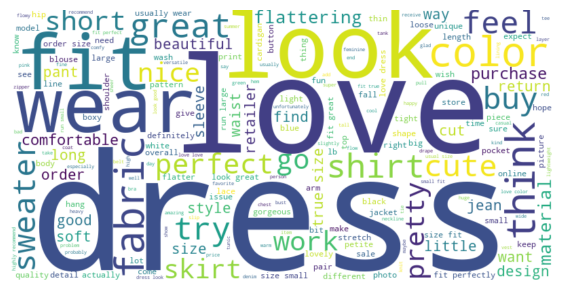

In [19]:
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    max_words=200
).generate(text)

plt.figure(figsize=(7,4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#### Kitten shape ###

In [20]:
mask = np.array(Image.open(r"C:\Users\lily\Desktop\IT alapok privát\PRIV DATA SC NLP\Wordcloud\catdrawing.jpg"))

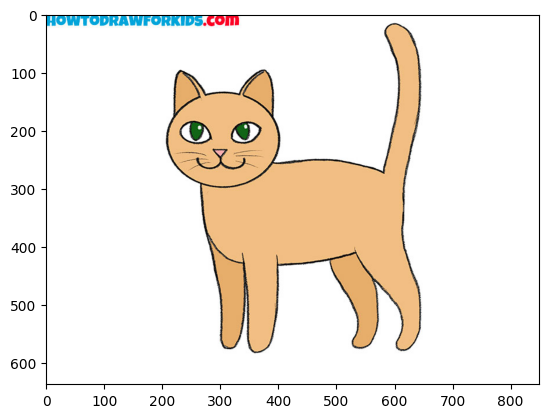

In [21]:
plt.imshow(mask)

In [22]:
word_cloud2 = WordCloud(background_color = 'white',
                        mask = mask,
                        max_words=200,
                        width = 2048, 
                        height = 1080,
                        contour_width=1,
                        contour_color='black').generate(text)

In [23]:
img_colors = ImageColorGenerator(mask)
word_cloud2.recolor(color_func = img_colors)

In [24]:
word_cloud2.to_file('kittenshape.png')

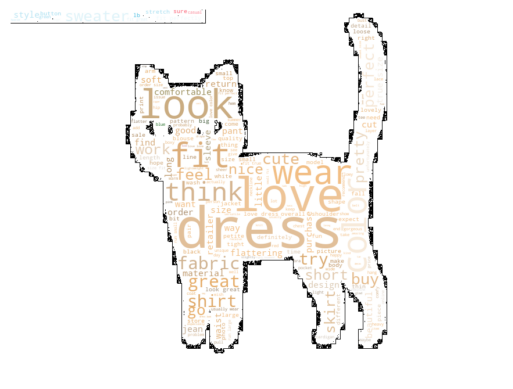

In [25]:
plt.imshow(word_cloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

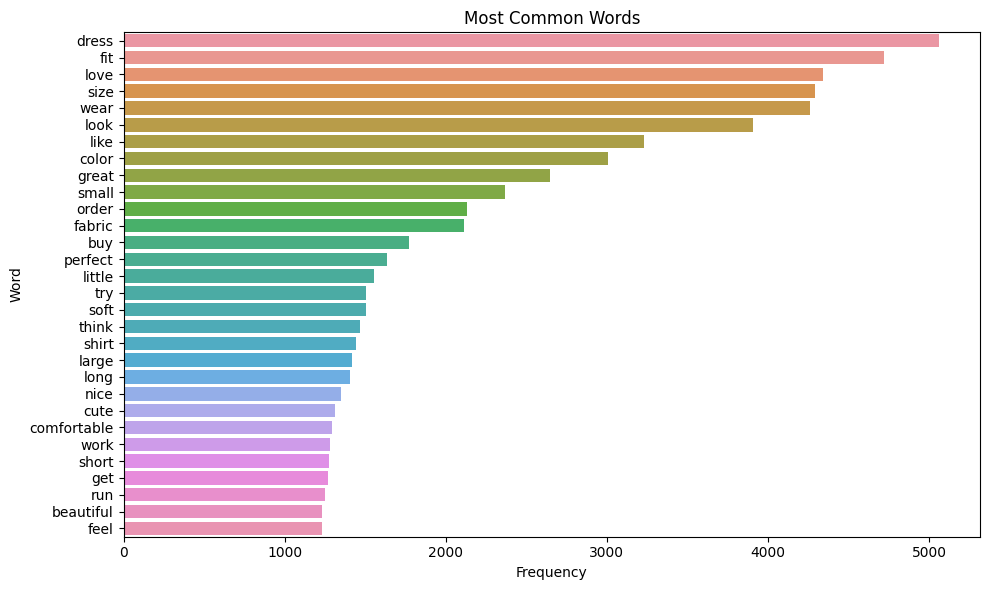

In [101]:
counter = Counter(text.split())

most_common = counter.most_common(30)

filtered_words = [word for word, count in most_common if word not in stopwords.words('english')]
word_counts = [count for word, count in most_common if word not in stopwords.words('english')]

fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x=word_counts, y=filtered_words, ax=ax)

ax.set_xlabel('Frequency')
ax.set_ylabel('Word')
ax.set_title('Most Common Words')

plt.tight_layout()
plt.show()

### NLKT 

In [27]:
lemmatizer = WordNetLemmatizer()

In [28]:
text2 = list(df['Review Text'])

In [29]:
text2

['Absolutely wonderful - silky and sexy and comfortable',
 'Love this dress!  it\'s sooo pretty.  i happened to find it in a store, and i\'m glad i did bc i never would have ordered it online bc it\'s petite.  i bought a petite and am 5\'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.',
 'I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c',
 "I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments

In [31]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lily\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [32]:
corpus = []
all_words = []

for i in range(len(text2)):
    r = re.sub('[^a-zA-Z]', ' ', text2[i])
    r = r.lower()
    r = r.split()
    r = [word for word in r if word not in stopwords.words('english')]

    for u in r:
      all_words.append(str(u))

    r = [lemmatizer.lemmatize(word) for word in r]
    r = ' '.join(r)
    corpus.append(r)

df['text'] = corpus
df.head()

,Clothing ID,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,cleaned_review_text,text
0,767,33,Absolutely wonderful - silky and sexy and comfortable,4,1,0,Initmates,Intimate,Intimates,absolutely wonderful silky sexy comfortable,absolutely wonderful silky sexy comfortable
1,1080,34,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",5,1,4,General,Dresses,Dresses,love dress sooo pretty happen find store glad bc order online bc petite buy petite love length hit little knee definitely true midi truly petite,love dress sooo pretty happened find store glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite
2,1077,60,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c",3,0,0,General,Dresses,Dresses,high hope dress want work initially order petite small usual size find outrageously small small fact zip reorder petite medium ok overall half comfortable fit nicely half tight layer somewhat cheap net layer imo major design flaw net layer sew directly zipper c,high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could zip reordered petite medium ok overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sewn directly zipper c
3,1049,50,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,1,0,General Petite,Bottoms,Pants,love love love jumpsuit fun flirty fabulous time wear great compliment,love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment
4,847,47,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,1,6,General,Tops,Blouses,shirt flattering adjustable tie perfect length wear legging sleeveless pair cardigan love shirt,shirt flattering due adjustable front tie perfect length wear legging sleeveless pair well cardigan love shirt
